In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import numpy as np

In [2]:
file_path = 'csvs/movies_metadata.csv'

df = pd.read_csv(file_path, low_memory=False)

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Drop rows where 'release_date' is NaT (invalid dates)
df = df.dropna(subset=['release_date'])


In [3]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x

def convert_column(column):
    return column.apply(lambda x: safe_literal_eval(x) if pd.notna(x) else x)

for col in df.columns:
    df[col] = convert_column(df[col])


print(df.dtypes)

print(df.head())


<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal
<unknown>:1: SyntaxWarning: invalid decimal literal


adult                              bool
belongs_to_collection            object
budget                            int64
genres                           object
homepage                         object
id                                int64
imdb_id                          object
original_language                object
original_title                   object
overview                         object
popularity                      float64
poster_path                      object
production_companies             object
production_countries             object
release_date             datetime64[ns]
revenue                         float64
runtime                         float64
spoken_languages                 object
status                           object
tagline                          object
title                            object
video                              bool
vote_average                    float64
vote_count                      float64
dtype: object
   adult                  

In [4]:
df.loc[0,'spoken_languages']

[{'iso_639_1': 'en', 'name': 'English'}]

In [5]:
df_filtered = df[df['original_language'] == 'en'] 

In [6]:
df_filtered.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [7]:
print(len(df))
print(len(df_filtered))

45376
32202


In [8]:
df_w_money = df_filtered[df_filtered['revenue'] != 0]

In [9]:

print(len(df_filtered))
print(len(df_w_money))

32202
6355


In [10]:
df_w_money = df_w_money[df_w_money['release_date'] >= '1980-1-10']

In [11]:
print(df_w_money[['release_date', 'revenue']].head())

  release_date      revenue
0   1995-10-30  373554033.0
1   1995-12-15  262797249.0
3   1995-12-22   81452156.0
4   1995-02-10   76578911.0
5   1995-12-15  187436818.0


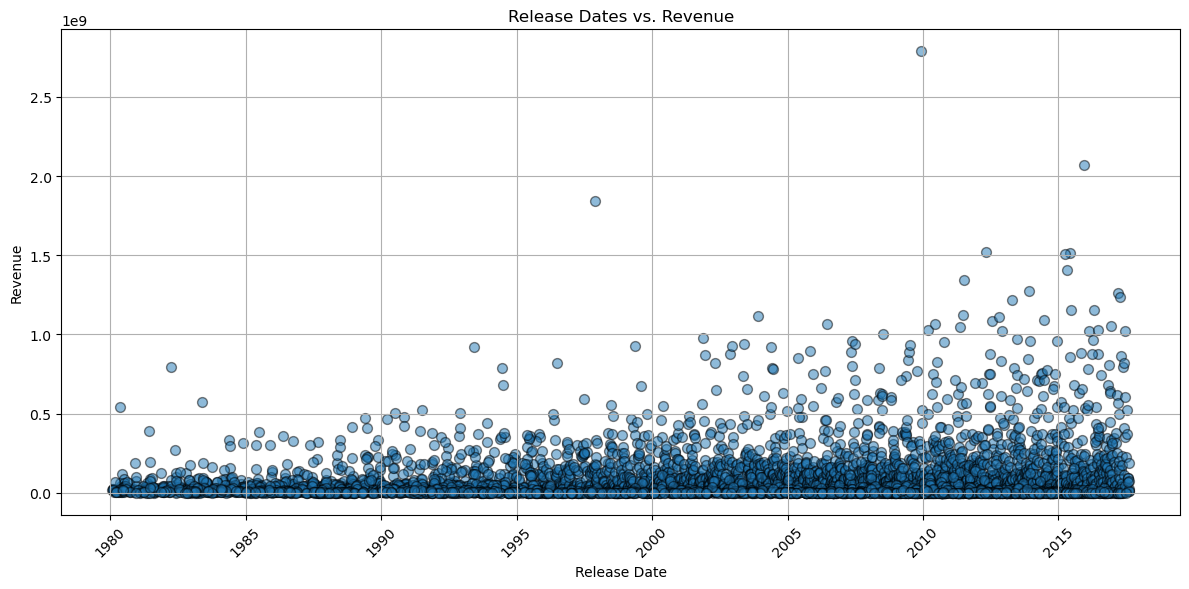

In [12]:
plt.figure(figsize=(12, 6))
plt.scatter(df_w_money['release_date'], df_w_money['revenue'], alpha=0.5, edgecolor='k', s=50)
plt.title('Release Dates vs. Revenue')
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [13]:
df_w_money.loc[0,'belongs_to_collection']

{'id': 10194,
 'name': 'Toy Story Collection',
 'poster_path': '/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg',
 'backdrop_path': '/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg'}

In [14]:
m_collections = df_w_money.dropna(subset = ['belongs_to_collection'])

print(len(df_w_money))
print(len(m_collections))

5770
1163


In [15]:
m_collections['collection_id'] = m_collections['belongs_to_collection'].apply(lambda x: x.get('id') if isinstance(x, dict) else None)

C:\Users\ethan\AppData\Local\Temp\ipykernel_8392\1181052761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m_collections['collection_id'] = m_collections['belongs_to_collection'].apply(lambda x: x.get('id') if isinstance(x, dict) else None)


In [16]:
m_collections.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collection_id
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,10194
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,96871
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,645
12,False,"{'id': 117693, 'name': 'Balto Collection', 'po...",0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",NaN,21032,tt0112453,en,Balto,An outcast half-wolf risks his life to prevent...,...,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Part Dog. Part Wolf. All Hero.,Balto,False,7.1,423.0,117693
18,False,"{'id': 3167, 'name': 'Ace Ventura Collection',...",30000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,9273,tt0112281,en,Ace Ventura: When Nature Calls,"Summoned from an ashram in Tibet, Ace finds hi...",...,212385533.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,New animals. New adventures. Same hair.,Ace Ventura: When Nature Calls,False,6.1,1128.0,3167


In [17]:
df_sorted = m_collections.sort_values(by=['collection_id', 'release_date'])

In [18]:
df_sorted.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collection_id
1154,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",18000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1891,tt0080684,en,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",...,538400000.0,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Adventure Continues...,The Empire Strikes Back,False,8.2,5998.0,10
1167,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",32350000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1892,tt0086190,en,Return of the Jedi,As Rebel leaders map their strategy for an all...,...,572700000.0,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Empire Falls...,Return of the Jedi,False,7.9,4763.0,10
2514,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",115000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1893,tt0120915,en,Star Wars: Episode I - The Phantom Menace,"Anakin Skywalker, a young slave strong with th...",...,924317558.0,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a legend. Every journey h...,Star Wars: Episode I - The Phantom Menace,False,6.4,4526.0,10
5244,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",120000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1894,tt0121765,en,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the gal...",...,649398328.0,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,False,6.4,4074.0,10
10069,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",113000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.starwars.com/films/star-wars-episod...,1895,tt0121766,en,Star Wars: Episode III - Revenge of the Sith,"Years after the onset of the Clone Wars, the n...",...,850000000.0,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The saga is complete.,Star Wars: Episode III - Revenge of the Sith,False,7.1,4200.0,10


In [19]:
df_sorted['is_sequel'] = df_sorted.duplicated(subset=['collection_id'], keep='first')

In [20]:
df_sorted.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,collection_id,is_sequel
1154,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",18000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1891,tt0080684,en,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",...,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Adventure Continues...,The Empire Strikes Back,False,8.2,5998.0,10,False
1167,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",32350000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1892,tt0086190,en,Return of the Jedi,As Rebel leaders map their strategy for an all...,...,135.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Empire Falls...,Return of the Jedi,False,7.9,4763.0,10,True
2514,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",115000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1893,tt0120915,en,Star Wars: Episode I - The Phantom Menace,"Anakin Skywalker, a young slave strong with th...",...,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Every generation has a legend. Every journey h...,Star Wars: Episode I - The Phantom Menace,False,6.4,4526.0,10,True
5244,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",120000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1894,tt0121765,en,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the gal...",...,142.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,False,6.4,4074.0,10,True
10069,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",113000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.starwars.com/films/star-wars-episod...,1895,tt0121766,en,Star Wars: Episode III - Revenge of the Sith,"Years after the onset of the Clone Wars, the n...",...,140.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The saga is complete.,Star Wars: Episode III - Revenge of the Sith,False,7.1,4200.0,10,True


In [21]:
df_sequels = df_sorted[df_sorted['is_sequel']]

print(len(df_sequels))
print(len(df_sorted))

568
1163


In [22]:
df_first_of_collection = df_sorted[~df_sorted['is_sequel']]

In [23]:
print(len(df_sequels))
print(len(df_first_of_collection))

568
595


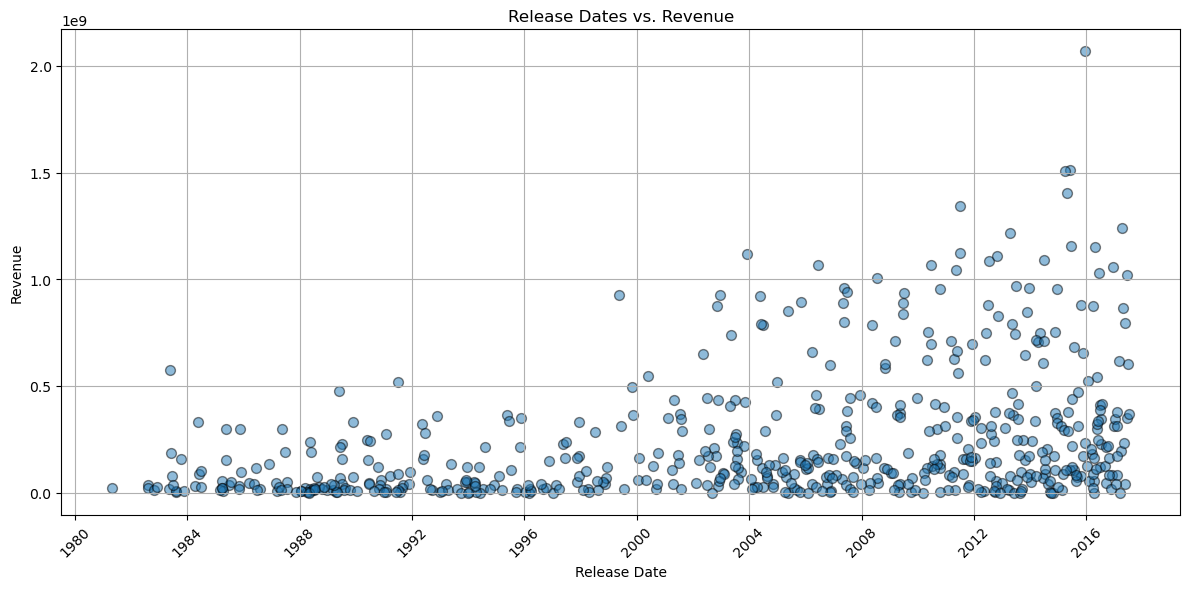

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(df_sequels['release_date'], df_sequels['revenue'], alpha=0.5, edgecolor='k', s=50)
plt.title('Release Dates vs. Revenue')
plt.xlabel('Release Date')
plt.ylabel('Revenue')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
import datetime
from datetime import timedelta

In [26]:
df_ordered = df_sorted.sort_values(by=['collection_id', 'release_date'])
# df_ordered.tail()

In [27]:
# print(df_grouped.groupby('collection_id')['release_date'].shift())

df_ordered['last_release'] = df_ordered.groupby('collection_id')['release_date'].shift()

# df_ordered.head(15)


In [28]:

df_ordered['years_since_prev'] = (df_ordered['release_date'] - df_ordered['last_release']).dt.days / 365
# df_ordered.head()

In [29]:
df_ordered['long_awaited'] = (df_ordered['years_since_prev'] >= 10) & df_ordered['is_sequel']

In [30]:
df_ordered['rev_prev'] = df_ordered.groupby('collection_id')['revenue'].shift()
# df_ordered.head()

In [31]:
df_ordered['rev_increase'] = ((df_ordered['revenue'] / df_ordered['rev_prev']) - 1) * 100
# df_ordered.head()

In [32]:
improvementMovies = df_ordered.sort_values(by=['rev_increase'])
# improvementMovies.head(100)

In [77]:
df_ordered['prof'] = df_ordered['revenue'] - df_ordered['budget']
df_ordered.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_average,vote_count,collection_id,is_sequel,last_release,years_since_prev,long_awaited,rev_prev,rev_increase,prof
1154,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",18000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1891,tt0080684,en,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",...,8.2,5998.0,10,False,NaT,NaN,False,NaN,NaN,520400000.0
1167,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",32350000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1892,tt0086190,en,Return of the Jedi,As Rebel leaders map their strategy for an all...,...,7.9,4763.0,10,True,1980-05-17,3.016438,False,538400000.0,6.370728,540350000.0
2514,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",115000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1893,tt0120915,en,Star Wars: Episode I - The Phantom Menace,"Anakin Skywalker, a young slave strong with th...",...,6.4,4526.0,10,True,1983-05-23,16.000000,True,572700000.0,61.396466,809317558.0
5244,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",120000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1894,tt0121765,en,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the gal...",...,6.4,4074.0,10,True,1999-05-19,2.991781,False,924317558.0,-29.742941,529398328.0
10069,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",113000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.starwars.com/films/star-wars-episod...,1895,tt0121766,en,Star Wars: Episode III - Revenge of the Sith,"Years after the onset of the Clone Wars, the n...",...,7.1,4200.0,10,True,2002-05-15,3.008219,False,649398328.0,30.890389,737000000.0


In [71]:
improvementMovies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,collection_id,is_sequel,last_release,years_since_prev,long_awaited,rev_prev,rev_increase
17276,False,"{'id': 86668, 'name': 'Elektra Luxx Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",http://www.elektraluxx-movie.com/,56272,tt1340773,en,Elektra Luxx,A favor for a woman from her past throws the l...,...,False,4.7,49.0,86668,True,2009-11-13,0.331507,False,18097.0,-99.944742
21597,False,"{'id': 219691, 'name': 'I Spit on Your Grave C...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,207768,tt2537176,en,I Spit on Your Grave 2,"Naturally beautiful, Katie has just settled in...",...,False,5.9,281.0,219691,True,2010-06-17,3.191781,False,572809.0,-99.858766
40041,False,"{'id': 206559, 'name': 'StreetDance Collection...",0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",http://www.highstrungthemovie.com/,382399,tt3451230,en,High Strung,When a hip hop violinist busking in the New Yo...,...,False,7.1,256.0,206559,True,2010-05-19,5.893151,False,18144030.0,-99.705429
10095,False,"{'id': 12263, 'name': 'The Exorcist Collection...",30000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",NaN,12700,tt0449086,en,Dominion: Prequel to the Exorcist,Having lived through traumatizing events durin...,...,False,4.8,77.0,12263,True,2004-08-20,0.747945,False,78000586.0,-99.677573
43565,False,"{'id': 466004, 'name': 'A Few Best Men Collect...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,413391,tt3784652,en,A Few Less Men,Travel plans for three men in ill-fitting wedd...,...,False,5.2,11.0,466004,True,2011-10-14,5.405479,False,29007412.0,-99.572871


In [81]:
df_ordered["movie_index"] = df_ordered.groupby('collection_id')['release_date'].cumcount() + 1
df_ordered.head(20)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,vote_count,collection_id,is_sequel,last_release,years_since_prev,long_awaited,rev_prev,rev_increase,prof,movie_index
1154,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",18000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1891,tt0080684,en,The Empire Strikes Back,"The epic saga continues as Luke Skywalker, in ...",...,5998.0,10,False,NaT,NaN,False,NaN,NaN,5.204000e+08,1
1167,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",32350000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1892,tt0086190,en,Return of the Jedi,As Rebel leaders map their strategy for an all...,...,4763.0,10,True,1980-05-17,3.016438,False,5.384000e+08,6.370728,5.403500e+08,2
2514,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",115000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1893,tt0120915,en,Star Wars: Episode I - The Phantom Menace,"Anakin Skywalker, a young slave strong with th...",...,4526.0,10,True,1983-05-23,16.000000,True,5.727000e+08,61.396466,8.093176e+08,3
5244,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",120000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.starwars.com/films/star-wars-episod...,1894,tt0121765,en,Star Wars: Episode II - Attack of the Clones,"Ten years after the invasion of Naboo, the gal...",...,4074.0,10,True,1999-05-19,2.991781,False,9.243176e+08,-29.742941,5.293983e+08,4
10069,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",113000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",http://www.starwars.com/films/star-wars-episod...,1895,tt0121766,en,Star Wars: Episode III - Revenge of the Sith,"Years after the onset of the Clone Wars, the n...",...,4200.0,10,True,2002-05-15,3.008219,False,6.493983e+08,30.890389,7.370000e+08,5
26555,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/star-wars-episod...,140607,tt2488496,en,Star Wars: The Force Awakens,Thirty years after defeating the Galactic Empi...,...,7993.0,10,True,2005-05-17,10.586301,True,8.500000e+08,143.320426,1.823224e+09,6
41489,False,"{'id': 10, 'name': 'Star Wars Collection', 'po...",200000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.starwars.com/films/rogue-one,330459,tt3748528,en,Rogue One: A Star Wars Story,A rogue band of resistance fighters unite for ...,...,5111.0,10,True,2015-12-15,1.000000,False,2.068224e+09,-48.938922,8.560573e+08,7
1156,False,"{'id': 84, 'name': 'Indiana Jones Collection',...",18000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.indianajones.com,85,tt0082971,en,Raiders of the Lost Ark,When Dr. Indiana Jones – the tweed-suited prof...,...,3949.0,84,False,NaT,NaN,False,NaN,NaN,3.719260e+08,1
2006,False,"{'id': 84, 'name': 'Indiana Jones Collection',...",28000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.indianajones.com,87,tt0087469,en,Indiana Jones and the Temple of Doom,"After arriving in India, Indiana Jones is aske...",...,2841.0,84,True,1981-06-12,2.947945,False,3.899260e+08,-14.599174,3.050000e+08,2
1246,False,"{'id': 84, 'name': 'Indiana Jones Collection',...",48000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.indianajones.com/crusade,89,tt0097576,en,Indiana Jones and the Last Crusade,When Dr. Henry Jones Sr. suddenly goes missing...,...,3221.0,84,True,1984-05-23,5.005479,False,3.330000e+08,42.393936,4.261718e+08,3


In [33]:
# import pandas as pd
# import matplotlib.pyplot as plt
# from datetime import timedelta

# # Assuming df_sorted is your existing sorted dataframe
# # Group by collection_id and sort by release_date within each group
# df_grouped = df_sorted.sort_values(['collection_id', 'release_date'])

# # Calculate time difference between each movie and its predecessor in the same collection
# df_grouped['prev_release_date'] = df_grouped.groupby('collection_id')['release_date'].shift()
# df_grouped['years_since_prev'] = (df_grouped['release_date'] - df_grouped['prev_release_date']).dt.days / 365.25

# # Flag late sequels (those released at least 10 years after their predecessor)
# df_grouped['is_late_sequel'] = (df_grouped['years_since_prev'] >= 10) & df_grouped['is_sequel']

# # Separate late sequels and other movies
# late_sequels = df_grouped[df_grouped['is_late_sequel']]
# other_movies = df_grouped[~df_grouped['is_late_sequel']]

# # Create the scatter plot
# plt.figure(figsize=(12, 6))
# plt.scatter(other_movies['release_date'], other_movies['revenue'], 
#             alpha=0.5, label='Other Movies', color='blue')
# plt.scatter(late_sequels['release_date'], late_sequels['revenue'], 
#             alpha=0.5, label='Late Sequels (10+ years)', color='red')

# plt.title('Release Dates vs. Revenue: Late Sequels vs Other Movies')
# plt.xlabel('Release Date')
# plt.ylabel('Revenue')
# plt.legend()
# plt.grid(True)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45)
# plt.tight_layout()

# # Show the plot
# plt.show()

# # Print some statistics
# print(f"Number of late sequels: {len(late_sequels)}")
# print(f"Number of other movies: {len(other_movies)}")
# print(f"Average revenue of late sequels: ${late_sequels['revenue'].mean():,.2f}")
# print(f"Average revenue of other movies: ${other_movies['revenue'].mean():,.2f}")
